In [69]:
import tensorflow as tf
import pandas as pd
import numpy as np
import os
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score

In [84]:
import matplotlib.pyplot as plt
%matplotlib inline

In [13]:
housing=pd.read_csv("cal_housing_clean.csv")
housing.info()
y=housing['medianHouseValue']
x=housing.drop('medianHouseValue',axis=1)
train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=0.3,random_state=1)
scl=MinMaxScaler()
train_x=scl.fit_transform(train_x)
test_x=scl.transform(test_x)
train_y=train_y.values
test_y=test_y.values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 7 columns):
housingMedianAge    20640 non-null float64
totalRooms          20640 non-null float64
totalBedrooms       20640 non-null float64
population          20640 non-null float64
households          20640 non-null float64
medianIncome        20640 non-null float64
medianHouseValue    20640 non-null float64
dtypes: float64(7)
memory usage: 1.1 MB


In [233]:
tf.reset_default_graph()
w=tf.get_variable(name="w",shape=(6,1),dtype="float64")
b=tf.get_variable(name='b',shape=(1,1),dtype="float64")

In [234]:
obs=train_x.shape[0]

In [235]:
x=tf.placeholder(name="x",shape=(None,6),dtype="float64")
y=tf.placeholder(name='y',shape=(None,),dtype="float64")

In [236]:
y_pred=tf.add(tf.matmul(x,w),b)
error=tf.reduce_sum(tf.square(tf.subtract(y_pred,tf.reshape(y,shape=(-1,1)))))
optimizer=tf.train.AdamOptimizer(learning_rate=1e-1)
train=optimizer.minimize(error)


In [237]:
sess=tf.InteractiveSession()

S:\Anaconda\envs\py36\lib\site-packages\tensorflow\python\client\session.py:1711: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


In [238]:
batch_size=64
steps=60000
size=int(obs/batch_size)
print(size)
batches=[batch_size*i for i in range(size-1)]+[obs]
#batches=[0,obs]
print(batches)

225
[0, 64, 128, 192, 256, 320, 384, 448, 512, 576, 640, 704, 768, 832, 896, 960, 1024, 1088, 1152, 1216, 1280, 1344, 1408, 1472, 1536, 1600, 1664, 1728, 1792, 1856, 1920, 1984, 2048, 2112, 2176, 2240, 2304, 2368, 2432, 2496, 2560, 2624, 2688, 2752, 2816, 2880, 2944, 3008, 3072, 3136, 3200, 3264, 3328, 3392, 3456, 3520, 3584, 3648, 3712, 3776, 3840, 3904, 3968, 4032, 4096, 4160, 4224, 4288, 4352, 4416, 4480, 4544, 4608, 4672, 4736, 4800, 4864, 4928, 4992, 5056, 5120, 5184, 5248, 5312, 5376, 5440, 5504, 5568, 5632, 5696, 5760, 5824, 5888, 5952, 6016, 6080, 6144, 6208, 6272, 6336, 6400, 6464, 6528, 6592, 6656, 6720, 6784, 6848, 6912, 6976, 7040, 7104, 7168, 7232, 7296, 7360, 7424, 7488, 7552, 7616, 7680, 7744, 7808, 7872, 7936, 8000, 8064, 8128, 8192, 8256, 8320, 8384, 8448, 8512, 8576, 8640, 8704, 8768, 8832, 8896, 8960, 9024, 9088, 9152, 9216, 9280, 9344, 9408, 9472, 9536, 9600, 9664, 9728, 9792, 9856, 9920, 9984, 10048, 10112, 10176, 10240, 10304, 10368, 10432, 10496, 10560, 10624, 10

In [239]:
init=tf.global_variables_initializer()
all_cost=[]
sess.run(init)
for i in range(steps):
    net_cost=0
    for epoch in range(size-1):
        x_batch=train_x[batches[epoch]:batches[epoch+1],:]
        y_batch=train_y[batches[epoch]:batches[epoch+1]]
        cost,_=sess.run([error,train],feed_dict={x:x_batch,y:y_batch})
        net_cost+=cost
    all_cost.append(net_cost)
    if i%1000 ==0:
        print("net cost per epoch = {:f}".format(net_cost))



net cost per epoch = 816241583974125.625000
net cost per epoch = 563657402492018.375000
net cost per epoch = 372778402387581.937500
net cost per epoch = 243581140065985.093750
net cost per epoch = 175866071463648.062500
net cost per epoch = 159691635689109.906250
net cost per epoch = 154338721261961.000000
net cost per epoch = 149293080179851.250000
net cost per epoch = 144514754982609.812500
net cost per epoch = 139999700978259.015625
net cost per epoch = 135740144248852.843750
net cost per epoch = 131728670966497.218750
net cost per epoch = 127958438176732.640625
net cost per epoch = 124423126544828.875000
net cost per epoch = 121116861661696.812500
net cost per epoch = 118034115831259.484375
net cost per epoch = 115169590042323.343750
net cost per epoch = 112518074849479.515625
net cost per epoch = 110074289149025.640625
net cost per epoch = 107832697323524.546875
net cost per epoch = 105787308503727.281250
net cost per epoch = 103931467219220.984375
net cost per epoch = 10225765239

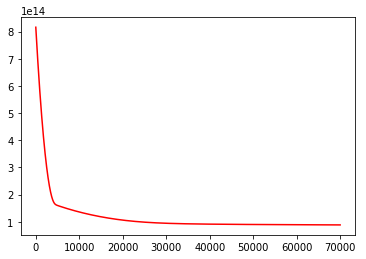

In [247]:
plt.plot(all_cost,"r")

In [248]:
weight=w.eval()
bias=b.eval()
print(weight)

[[ 102980.34944562]
 [ -33957.81261242]
 [ 187676.96749356]
 [-454349.59493312]
 [ 196651.74880405]
 [ 633768.57310164]]


In [252]:
y_predicted= np.matmul(train_x,weight)+bias
print(y_predicted.shape)
print(r2_score(train_y,y_predicted))

(14448, 1)
0.5443685899434554


In [254]:
y_predicted= np.matmul(test_x,weight)+bias
print(y_predicted.shape)
print(r2_score(test_y,y_predicted))

(6192, 1)
0.5317110890960915


In [259]:
from keras.models import Sequential
from keras import losses,metrics, optimizers
from keras.layers import Dense

In [264]:
model=Sequential()
model.add(Dense(units=5,input_dim=6,activation='relu'))
model.add(Dense(units=3,activation='relu'))
model.add(Dense(units=1))
model.compile(optimizer=optimizers.Adam(lr=1e-2),loss=losses.mean_squared_error,metrics=[metrics.mae])
model.fit(train_x,train_y,epochs=1000,batch_size=64)

Epoch 1/1000
14448/14448 [==============================] - 0s 22us/step - loss: 56457890978.1617 - mean_absolute_error: 207542.5615
Epoch 2/1000
14448/14448 [==============================] - 0s 14us/step - loss: 55469788458.2414 - mean_absolute_error: 205228.8488
Epoch 3/1000
14448/14448 [==============================] - 0s 14us/step - loss: 51779481436.7043 - mean_absolute_error: 196325.2064
Epoch 4/1000
14448/14448 [==============================] - 0s 14us/step - loss: 44637488668.9169 - mean_absolute_error: 177828.8617
Epoch 5/1000
14448/14448 [==============================] - 0s 14us/step - loss: 34910078429.4131 - mean_absolute_error: 149450.1370
Epoch 6/1000
14448/14448 [==============================] - 0s 14us/step - loss: 24889106763.1274 - mean_absolute_error: 117790.3622
Epoch 7/1000
14448/14448 [==============================] - 0s 14us/step - loss: 17208471713.0277 - mean_absolute_error: 94012.4596
Epoch 8/1000
14448/14448 [==============================] - 0s 14us/st

14448/14448 [==============================] - 0s 14us/step - loss: 6261795276.9701 - mean_absolute_error: 59205.5573
Epoch 63/1000
14448/14448 [==============================] - 0s 15us/step - loss: 6254095989.3688 - mean_absolute_error: 59129.2522
Epoch 64/1000
14448/14448 [==============================] - 0s 14us/step - loss: 6247963249.9668 - mean_absolute_error: 59068.2890
Epoch 65/1000
14448/14448 [==============================] - 0s 14us/step - loss: 6242111689.2846 - mean_absolute_error: 59022.4434
Epoch 66/1000
14448/14448 [==============================] - 0s 14us/step - loss: 6236377194.0288 - mean_absolute_error: 59044.2522
Epoch 67/1000
14448/14448 [==============================] - 0s 14us/step - loss: 6229837645.9623 - mean_absolute_error: 58977.1745
Epoch 68/1000
14448/14448 [==============================] - 0s 15us/step - loss: 6224228757.9712 - mean_absolute_error: 58898.8094
Epoch 69/1000
14448/14448 [==============================] - 0s 14us/step - loss: 62186790

Epoch 124/1000
14448/14448 [==============================] - 0s 14us/step - loss: 5980882733.6434 - mean_absolute_error: 57466.4105
Epoch 125/1000
14448/14448 [==============================] - 0s 15us/step - loss: 5976810173.3776 - mean_absolute_error: 57453.6677
Epoch 126/1000
14448/14448 [==============================] - 0s 14us/step - loss: 5972290147.2248 - mean_absolute_error: 57364.7860
Epoch 127/1000
14448/14448 [==============================] - 0s 14us/step - loss: 5968415094.7863 - mean_absolute_error: 57345.2545
Epoch 128/1000
14448/14448 [==============================] - 0s 14us/step - loss: 5965664819.0299 - mean_absolute_error: 57397.4667
Epoch 129/1000
14448/14448 [==============================] - 0s 14us/step - loss: 5962070014.2990 - mean_absolute_error: 57238.9116
Epoch 130/1000
14448/14448 [==============================] - 0s 15us/step - loss: 5959758348.4740 - mean_absolute_error: 57377.2592
Epoch 131/1000
14448/14448 [==============================] - 0s 14us

14448/14448 [==============================] - 0s 14us/step - loss: 5800553403.9601 - mean_absolute_error: 56470.9123
Epoch 186/1000
14448/14448 [==============================] - 0s 14us/step - loss: 5799795768.6999 - mean_absolute_error: 56357.8760
Epoch 187/1000
14448/14448 [==============================] - 0s 14us/step - loss: 5796341203.7741 - mean_absolute_error: 56401.2143
Epoch 188/1000
14448/14448 [==============================] - 0s 14us/step - loss: 5795432060.7398 - mean_absolute_error: 56357.2901
Epoch 189/1000
14448/14448 [==============================] - 0s 14us/step - loss: 5792888399.3798 - mean_absolute_error: 56304.7261
Epoch 190/1000
14448/14448 [==============================] - 0s 14us/step - loss: 5792333309.1650 - mean_absolute_error: 56373.7996
Epoch 191/1000
14448/14448 [==============================] - 0s 14us/step - loss: 5789397746.1085 - mean_absolute_error: 56317.0971
Epoch 192/1000
14448/14448 [==============================] - 0s 14us/step - loss: 5

14448/14448 [==============================] - 0s 15us/step - loss: 5717852876.1196 - mean_absolute_error: 55925.6168
Epoch 247/1000
14448/14448 [==============================] - 0s 15us/step - loss: 5714230722.7641 - mean_absolute_error: 55831.9561
Epoch 248/1000
14448/14448 [==============================] - 0s 15us/step - loss: 5717597428.3765 - mean_absolute_error: 55970.5529
Epoch 249/1000
14448/14448 [==============================] - 0s 14us/step - loss: 5716293260.6157 - mean_absolute_error: 55920.4434
Epoch 250/1000
14448/14448 [==============================] - 0s 14us/step - loss: 5714357437.9446 - mean_absolute_error: 55913.0574
Epoch 251/1000
14448/14448 [==============================] - 0s 14us/step - loss: 5714287334.7685 - mean_absolute_error: 55898.7522
Epoch 252/1000
14448/14448 [==============================] - 0s 14us/step - loss: 5712699812.1462 - mean_absolute_error: 55875.8881
Epoch 253/1000
14448/14448 [==============================] - 0s 14us/step - loss: 5

14448/14448 [==============================] - 0s 14us/step - loss: 5691555119.9114 - mean_absolute_error: 55783.9551
Epoch 308/1000
14448/14448 [==============================] - 0s 14us/step - loss: 5691363122.1794 - mean_absolute_error: 55734.4336
Epoch 309/1000
14448/14448 [==============================] - 0s 14us/step - loss: 5690052059.9956 - mean_absolute_error: 55834.3132
Epoch 310/1000
14448/14448 [==============================] - 0s 14us/step - loss: 5688863927.7076 - mean_absolute_error: 55725.1746
Epoch 311/1000
14448/14448 [==============================] - 0s 14us/step - loss: 5691091675.9956 - mean_absolute_error: 55837.7887
Epoch 312/1000
14448/14448 [==============================] - 0s 14us/step - loss: 5690747319.9911 - mean_absolute_error: 55735.6064
Epoch 313/1000
14448/14448 [==============================] - 0s 14us/step - loss: 5689978767.1672 - mean_absolute_error: 55747.7976
Epoch 314/1000
14448/14448 [==============================] - 0s 14us/step - loss: 5

14448/14448 [==============================] - 0s 16us/step - loss: 5685556894.4762 - mean_absolute_error: 55771.4770
Epoch 369/1000
14448/14448 [==============================] - 0s 15us/step - loss: 5685124327.3355 - mean_absolute_error: 55737.3149
Epoch 370/1000
14448/14448 [==============================] - 0s 15us/step - loss: 5685361296.3012 - mean_absolute_error: 55749.9002
Epoch 371/1000
14448/14448 [==============================] - 0s 15us/step - loss: 5685852055.6722 - mean_absolute_error: 55750.7039
Epoch 372/1000
14448/14448 [==============================] - 0s 14us/step - loss: 5685342027.1274 - mean_absolute_error: 55760.8266
Epoch 373/1000
14448/14448 [==============================] - 0s 14us/step - loss: 5685127923.8095 - mean_absolute_error: 55715.3828
Epoch 374/1000
14448/14448 [==============================] - 0s 14us/step - loss: 5684593181.4839 - mean_absolute_error: 55719.4750
Epoch 375/1000
14448/14448 [==============================] - 0s 15us/step - loss: 5

14448/14448 [==============================] - 0s 14us/step - loss: 5683250361.9756 - mean_absolute_error: 55742.3613
Epoch 430/1000
14448/14448 [==============================] - 0s 14us/step - loss: 5684511258.6489 - mean_absolute_error: 55711.9068
Epoch 431/1000
14448/14448 [==============================] - 0s 14us/step - loss: 5684480844.2614 - mean_absolute_error: 55762.7950
Epoch 432/1000
14448/14448 [==============================] - 0s 14us/step - loss: 5683233800.5050 - mean_absolute_error: 55710.3916
Epoch 433/1000
14448/14448 [==============================] - 0s 14us/step - loss: 5685404149.7940 - mean_absolute_error: 55817.5164
Epoch 434/1000
14448/14448 [==============================] - 0s 14us/step - loss: 5684450563.6855 - mean_absolute_error: 55733.3003
Epoch 435/1000
14448/14448 [==============================] - 0s 14us/step - loss: 5684908362.5604 - mean_absolute_error: 55733.3084
Epoch 436/1000
14448/14448 [==============================] - 0s 14us/step - loss: 5

14448/14448 [==============================] - 0s 14us/step - loss: 5683794941.1650 - mean_absolute_error: 55707.0624
Epoch 491/1000
14448/14448 [==============================] - 0s 14us/step - loss: 5683067108.5006 - mean_absolute_error: 55800.7908
Epoch 492/1000
14448/14448 [==============================] - 0s 15us/step - loss: 5684265552.5138 - mean_absolute_error: 55719.1893
Epoch 493/1000
14448/14448 [==============================] - 0s 16us/step - loss: 5684676279.7076 - mean_absolute_error: 55728.5694
Epoch 494/1000
14448/14448 [==============================] - 0s 15us/step - loss: 5685212222.0864 - mean_absolute_error: 55721.6693
Epoch 495/1000
14448/14448 [==============================] - 0s 15us/step - loss: 5682658859.0919 - mean_absolute_error: 55690.0246
Epoch 496/1000
14448/14448 [==============================] - 0s 15us/step - loss: 5684950368.1063 - mean_absolute_error: 55756.2654
Epoch 497/1000
14448/14448 [==============================] - 0s 15us/step - loss: 5

14448/14448 [==============================] - 0s 14us/step - loss: 5683503227.0388 - mean_absolute_error: 55742.3567
Epoch 552/1000
14448/14448 [==============================] - 0s 14us/step - loss: 5684367231.2913 - mean_absolute_error: 55722.2084
Epoch 553/1000
14448/14448 [==============================] - 0s 14us/step - loss: 5683268855.2115 - mean_absolute_error: 55734.3821
Epoch 554/1000
14448/14448 [==============================] - 0s 14us/step - loss: 5684984685.1473 - mean_absolute_error: 55738.3595
Epoch 555/1000
14448/14448 [==============================] - 0s 14us/step - loss: 5683800386.6224 - mean_absolute_error: 55728.3984
Epoch 556/1000
14448/14448 [==============================] - 0s 14us/step - loss: 5684105982.5825 - mean_absolute_error: 55703.8320
Epoch 557/1000
14448/14448 [==============================] - 0s 14us/step - loss: 5684604982.7154 - mean_absolute_error: 55744.5387
Epoch 558/1000
14448/14448 [==============================] - 0s 14us/step - loss: 5

14448/14448 [==============================] - 0s 15us/step - loss: 5682849803.9070 - mean_absolute_error: 55740.2870
Epoch 613/1000
14448/14448 [==============================] - 0s 15us/step - loss: 5683270693.9889 - mean_absolute_error: 55706.2742
Epoch 614/1000
14448/14448 [==============================] - 0s 16us/step - loss: 5684034822.5205 - mean_absolute_error: 55739.8212
Epoch 615/1000
14448/14448 [==============================] - 0s 16us/step - loss: 5680910639.9114 - mean_absolute_error: 55699.4838
Epoch 616/1000
14448/14448 [==============================] - 0s 17us/step - loss: 5684466323.7032 - mean_absolute_error: 55783.1258
Epoch 617/1000
14448/14448 [==============================] - 0s 17us/step - loss: 5684142745.6567 - mean_absolute_error: 55741.3052
Epoch 618/1000
14448/14448 [==============================] - 0s 16us/step - loss: 5682941504.0709 - mean_absolute_error: 55742.1848
Epoch 619/1000
14448/14448 [==============================] - 0s 16us/step - loss: 5

14448/14448 [==============================] - 0s 17us/step - loss: 5683155672.8771 - mean_absolute_error: 55743.1777
Epoch 674/1000
14448/14448 [==============================] - 0s 15us/step - loss: 5682936705.5592 - mean_absolute_error: 55769.3425
Epoch 675/1000
14448/14448 [==============================] - 0s 15us/step - loss: 5684756397.7852 - mean_absolute_error: 55746.3470
Epoch 676/1000
14448/14448 [==============================] - 0s 15us/step - loss: 5683763523.4729 - mean_absolute_error: 55750.6513
Epoch 677/1000
14448/14448 [==============================] - 0s 15us/step - loss: 5684754692.8195 - mean_absolute_error: 55715.0061
Epoch 678/1000
14448/14448 [==============================] - 0s 15us/step - loss: 5683897550.1041 - mean_absolute_error: 55749.4474
Epoch 679/1000
14448/14448 [==============================] - 0s 15us/step - loss: 5682656400.5847 - mean_absolute_error: 55667.3985
Epoch 680/1000
14448/14448 [==============================] - 0s 16us/step - loss: 5

14448/14448 [==============================] - 0s 14us/step - loss: 5683216763.0388 - mean_absolute_error: 55773.2700
Epoch 735/1000
14448/14448 [==============================] - 0s 15us/step - loss: 5682575604.9435 - mean_absolute_error: 55750.0460
Epoch 736/1000
14448/14448 [==============================] - 0s 15us/step - loss: 5684600387.4729 - mean_absolute_error: 55707.5716
Epoch 737/1000
14448/14448 [==============================] - 0s 16us/step - loss: 5684713589.6523 - mean_absolute_error: 55719.1164
Epoch 738/1000
14448/14448 [==============================] - 0s 15us/step - loss: 5683654134.6445 - mean_absolute_error: 55716.6513
Epoch 739/1000
14448/14448 [==============================] - 0s 14us/step - loss: 5684307150.1041 - mean_absolute_error: 55782.3799
Epoch 740/1000
14448/14448 [==============================] - 0s 15us/step - loss: 5683290876.0310 - mean_absolute_error: 55715.4085
Epoch 741/1000
14448/14448 [==============================] - 0s 15us/step - loss: 5

14448/14448 [==============================] - 0s 16us/step - loss: 5683807847.7608 - mean_absolute_error: 55731.7797
Epoch 796/1000
14448/14448 [==============================] - 0s 16us/step - loss: 5682987783.3710 - mean_absolute_error: 55768.2427
Epoch 797/1000
14448/14448 [==============================] - 0s 16us/step - loss: 5684748136.0443 - mean_absolute_error: 55679.7678
Epoch 798/1000
14448/14448 [==============================] - 0s 15us/step - loss: 5683282203.2159 - mean_absolute_error: 55739.8825
Epoch 799/1000
14448/14448 [==============================] - 0s 16us/step - loss: 5684149877.3688 - mean_absolute_error: 55750.2628
Epoch 800/1000
14448/14448 [==============================] - 0s 15us/step - loss: 5683428730.7553 - mean_absolute_error: 55736.4646
Epoch 801/1000
14448/14448 [==============================] - 0s 15us/step - loss: 5683371481.4441 - mean_absolute_error: 55737.1960
Epoch 802/1000
14448/14448 [==============================] - 0s 15us/step - loss: 5

14448/14448 [==============================] - 0s 15us/step - loss: 5683503653.9889 - mean_absolute_error: 55707.5969
Epoch 857/1000
14448/14448 [==============================] - 0s 16us/step - loss: 5683291486.4053 - mean_absolute_error: 55733.6151
Epoch 858/1000
14448/14448 [==============================] - 0s 16us/step - loss: 5682898884.4651 - mean_absolute_error: 55700.0015
Epoch 859/1000
14448/14448 [==============================] - 0s 16us/step - loss: 5679235828.9435 - mean_absolute_error: 55702.6154
Epoch 860/1000
14448/14448 [==============================] - 0s 16us/step - loss: 5684197401.5149 - mean_absolute_error: 55808.5868
Epoch 861/1000
14448/14448 [==============================] - 0s 16us/step - loss: 5682710840.9834 - mean_absolute_error: 55727.5283
Epoch 862/1000
14448/14448 [==============================] - 0s 16us/step - loss: 5683524305.2226 - mean_absolute_error: 55730.3355
Epoch 863/1000
14448/14448 [==============================] - 0s 16us/step - loss: 5

14448/14448 [==============================] - 0s 16us/step - loss: 5685169545.4972 - mean_absolute_error: 55780.8522
Epoch 918/1000
14448/14448 [==============================] - 0s 16us/step - loss: 5684420507.9247 - mean_absolute_error: 55741.3919
Epoch 919/1000
14448/14448 [==============================] - 0s 16us/step - loss: 5683694057.3200 - mean_absolute_error: 55689.5182
Epoch 920/1000
14448/14448 [==============================] - 0s 16us/step - loss: 5684095527.6899 - mean_absolute_error: 55757.6840
Epoch 921/1000
14448/14448 [==============================] - 0s 16us/step - loss: 5682422194.0377 - mean_absolute_error: 55775.5536
Epoch 922/1000
14448/14448 [==============================] - 0s 16us/step - loss: 5683822722.9767 - mean_absolute_error: 55709.6533
Epoch 923/1000
14448/14448 [==============================] - 0s 15us/step - loss: 5682013028.0753 - mean_absolute_error: 55768.7484
Epoch 924/1000
14448/14448 [==============================] - 0s 15us/step - loss: 5

14448/14448 [==============================] - 0s 16us/step - loss: 5683241024.6379 - mean_absolute_error: 55748.6656
Epoch 979/1000
14448/14448 [==============================] - 0s 16us/step - loss: 5683745894.6268 - mean_absolute_error: 55708.5025
Epoch 980/1000
14448/14448 [==============================] - 0s 15us/step - loss: 5682181963.1274 - mean_absolute_error: 55723.0715
Epoch 981/1000
14448/14448 [==============================] - 0s 16us/step - loss: 5682862450.8173 - mean_absolute_error: 55787.7477
Epoch 982/1000
14448/14448 [==============================] - 0s 16us/step - loss: 5682690727.8317 - mean_absolute_error: 55741.4915
Epoch 983/1000
14448/14448 [==============================] - 0s 16us/step - loss: 5683081655.4241 - mean_absolute_error: 55714.4924
Epoch 984/1000
14448/14448 [==============================] - 0s 16us/step - loss: 5684142205.8738 - mean_absolute_error: 55757.3571
Epoch 985/1000
14448/14448 [==============================] - 0s 16us/step - loss: 5

In [266]:
y_predicted= model.predict(x=train_x)
print(y_predicted.shape)
print(r2_score(train_y,y_predicted))
y_predicted_test= model.predict(x=test_x)
print(y_predicted_test.shape)
print(r2_score(test_y,y_predicted_test))

(14448, 1)
0.5754575705946865
(6192, 1)
0.5578487317639573
